# Predicting a Garbage image with the saved Models

In [5]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

## Loading the models saved

In [6]:
# Load the saved model
resnet_model = load_model("GarbageRecognition/model/garbage_resnet_model.h5")
#cnn_model = load_model("garbage_cnn_model.h5")
vgg_model = load_model("GarbageRecognition/model/garbage_vgg_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


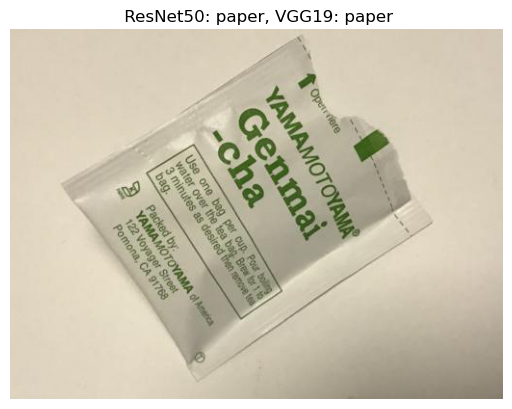

In [7]:
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Function to make predictions and plot the image with predictions
def predict_and_plot(img_path):
    img_array = load_and_preprocess_image(img_path)

    # Make predictions
   # cnn_pred = cnn_model.predict(img_array)
    resnet_pred = resnet_model.predict(img_array)
    vgg_pred = vgg_model.predict(img_array)

    # Decode predictions
    #cnn_class = class_names[np.argmax(cnn_pred)]
    resnet_class = class_names[np.argmax(resnet_pred)]
    vgg_class = class_names[np.argmax(vgg_pred)]

    # Plot the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f' ResNet50: {resnet_class}, VGG19: {vgg_class}')
    plt.show()

# Provide the path to an image and predict
img_path = 'GarbageRecognition/static/demo/trash.jpg'
predict_and_plot(img_path)

### Capture an image with the Camera and predict with the models

In [8]:
import time

In [9]:
def capture_image(file_path='captured_image.jpg'):
    # Open a connection to the camera
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        raise Exception("Could not open video device")

    # Set the camera resolution 
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    
    
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        if not ret:
            raise Exception("Failed to capture image")

        # Display the captured frame
        cv2.imshow('Press Space to Capture Image', frame)

        # Wait for key press
        key = cv2.waitKey(1)
        if key % 256 == 32:  # Spacebar key
            # Save the captured image when Space is pressed
            cv2.imwrite(file_path, frame)
            break

    cv2.imshow('Captured Image', frame)
    cap.release()
    
    cv2.destroyAllWindows()
    cv2.waitKey(1)  # Ensure all windows are closed

    

    return file_path


2024-06-03 21:58:45.121 python[14733:9619594] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


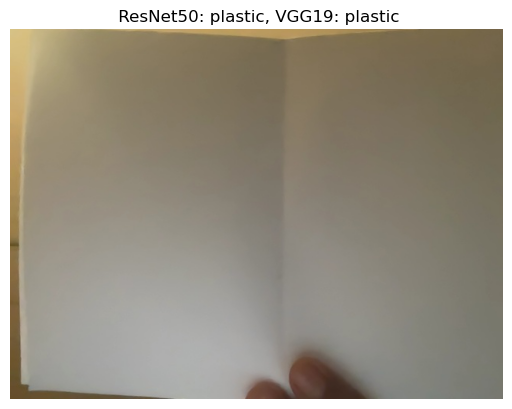

In [10]:
image_path = capture_image()
predict_and_plot(image_path)